

Using the Framingham Heart Study dataset, create and submit an EDA notebook that performs the following tasks:

1. Data cleaning and handling missing values
2. High-level aggregation and reporting summaries
3. Create five (5) visualizations

To receive a satisfactory grade, your notebook should follow a clear storyline, be organized, and offer a meaningful picture of the data.

#**Exploratory Data Analysis:Framingham Heart Study**

##**Data Dictionary**

+ sex : the gender of the observations. The variable is a binary named “male” in the dataset.

+ age : Age at the time of medical examination in years.

+ education : A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)

+ currentSmoker: Current cigarette smoking at the time of examinations

+ cigsPerDay: Number of cigarettes smoked each day

+ BPmeds: Use of Anti-hypertensive medication at exam

+ prevalentStroke: Prevalent Stroke (0 = free of disease)

+ prevalentHyp: Prevalent Hypertensive. Subject was defined as hypertensive if treated

+ diabetes: Diabetic according to criteria of first exam treated

+ totChol: Total cholesterol (mg/dL)

+ sysBP: Systolic Blood Pressure (mmHg)

+ diaBP: Diastolic blood pressure (mmHg)

+ BMI: Body Mass Index, weight (kg)/height (m)^2

+ heartRate: Heart rate (beats/minute)

+ glucose: Blood glucose level (mg/dL)

+ TenYearCHD : The 10 year risk of coronary heart disease(CHD).



In [ ]:
#Importing neccesary libraries and connecting githun
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import requests
from io import StringIO

file_url = "https://raw.githubusercontent.com/JishnuMoorthy/Framingham_Study/main/Framingham.csv"
response = requests.get(file_url)

if response.status_code == 200:
    df = pd.read_csv(StringIO(response.text))
else:
    print("Failed to fetch the file. Status code:", response.status_code)


In [ ]:
#Importing file and converting to pandas df
print(df.columns)
df

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
#Using describe to understand data through summary statistics
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#**Data Cleaning:**

In [ ]:
#Filling NA and empty cells in dataframe
df = df.fillna('Not available')
df = df.replace('', 'Not available')

#Checking for missing values in dataframe and filtering dataframe
df = df[~df.apply(lambda row: (row == 'Not available').any(), axis=1)]
print(df.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [ ]:
# Mapping numbers in 'education' column to string values for categorization (only run this code once!)
education_mapping = {
    1: "Some high school",
    2: "High school/GED",
    3: "Some college/vocational school",
    4: "College"
}

df['education'] = df['education'].map(education_mapping).fillna('Not Available')

<ipython-input-168-b358381db563>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = df['education'].map(education_mapping).fillna('Not Available')


In [ ]:
#Converting Numeric columns from object to float64
df[['heartRate','BMI','cigsPerDay','totChol','glucose']] = df[['heartRate','BMI','cigsPerDay','totChol','glucose']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   object 
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   object 
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(7), int64(7), object(2)
memory usage: 485.8+ KB


<ipython-input-169-55c3fdc9a2be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['heartRate','BMI','cigsPerDay','totChol','glucose']] = df[['heartRate','BMI','cigsPerDay','totChol','glucose']].astype(float)


#**High Level Aggregation and Summary**

<ipython-input-170-8e8f7d79ea32>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='plasma')


<Axes: >

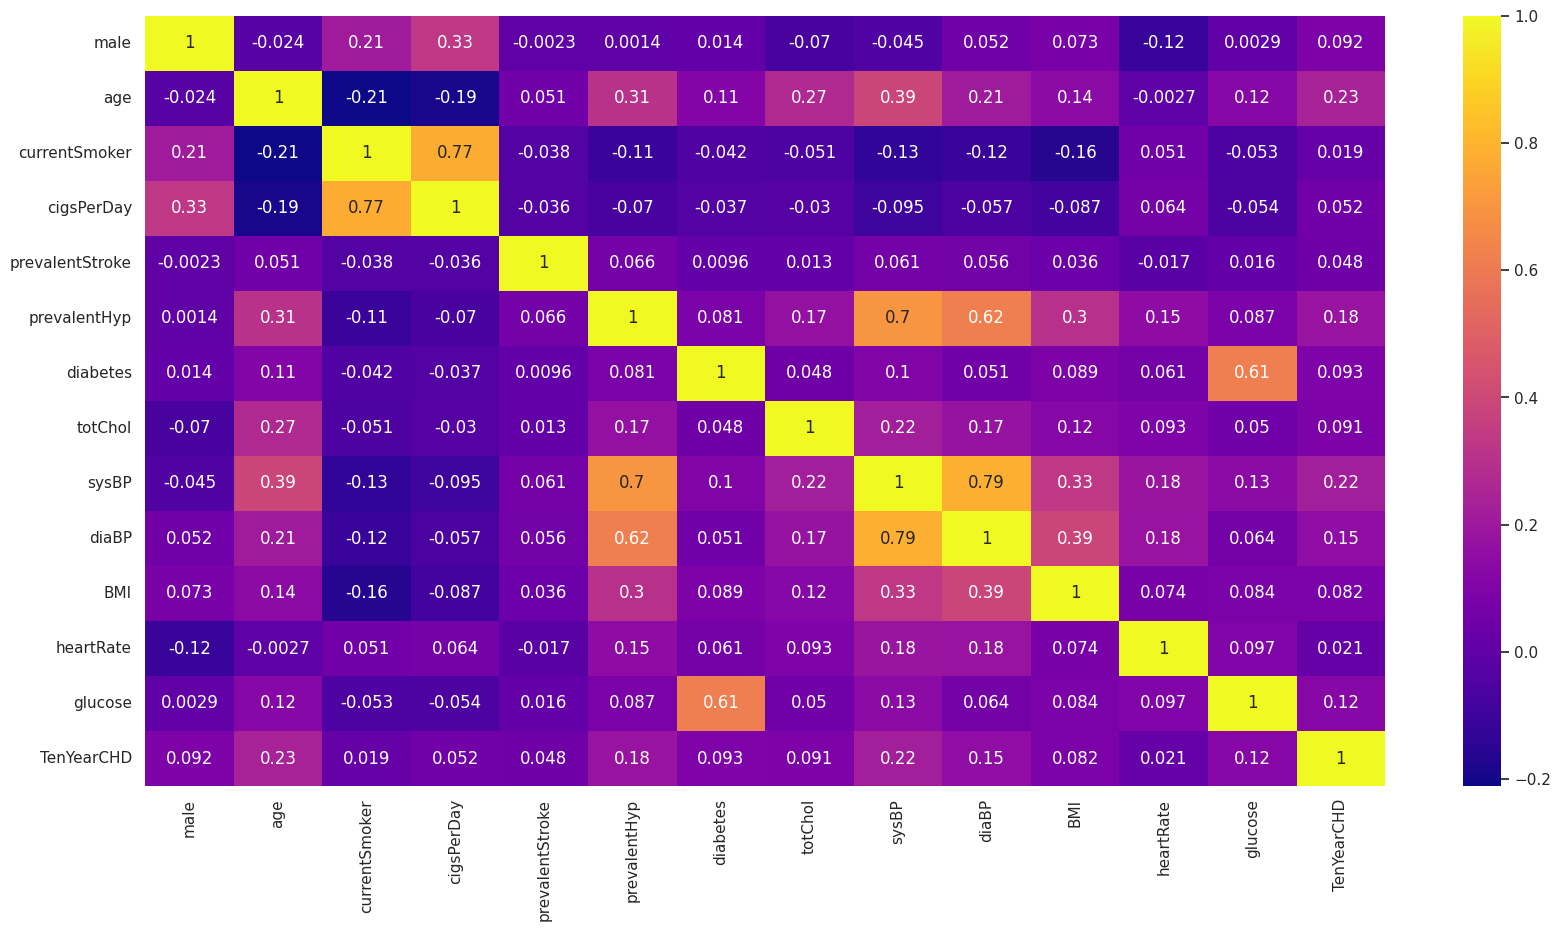

In [ ]:
#Creating Heatmap of correlation between variables
sns.set_context('notebook')
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='plasma')

**Obeservations:**

1. Age and systolic blood pressure (sysBP) show positive correlations with a higher risk of Ten-Year Coronary Heart Disease (CHD).

2. Smoking behavior (cigsPerDay and currentSmoker) and glucose levels (glucose) are positively associated with an increased risk of CHD.

3. Higher education levels exhibit negative correlations with factors like age, sysBP, prevalent hypertension (prevalentHyp), and body mass index (BMI).

4. The overall correlations with Ten-Year CHD are relatively weak, suggesting that multiple factors may contribute to the risk of coronary heart disease.

5. Blood pressure medication (BPMeds) and a history of prevalent stroke (prevalentStroke) have limited correlation with the risk of CHD in this dataset.



In [ ]:
#Categorizing the ages of participants into Early middle age, Late middle age, Late Adulthood
bins = [32, 46, 64, 100]
labels = ['Early Middle-Age', 'Middle-Aged', 'Late Adulthood']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_grouped = df.groupby('age_category').size()

#Creating Aggregations
df_grouped_age_mean = df.groupby('age_category').mean(numeric_only = True)
df_grouped_age_median = df.groupby('age_category').median(numeric_only = True)
df_grouped_education_mean = df.groupby('education').mean(numeric_only = True)

def custom_mode(x):
    return statistics.mode(x)
df_grouped_mode = df.groupby('age_category').agg(custom_mode)

# Calculate the percentage for each group
percentage_distribution = (age_grouped / age_grouped.sum()) * 100
percentage_df = pd.DataFrame({'Count': age_grouped, 'Percentage': percentage_distribution})
percentage_df.reset_index(inplace=True)
print("The percentage distrbution of participants in the relavent age grousp are:")
percentage_df

The percentage distrbution of participants in the relavent age grousp are:


,age_category,Count,Percentage
0,Early Middle-Age,1374,37.561509
1,Middle-Aged,2064,56.424276
2,Late Adulthood,220,6.014215


**Observations:**

The majority of individuals in the dataset fall into the "Middle-Aged" category, accounting for approximately 56.42% of the total. "Early Middle-Age" follows with 37.56%, and "Late Adulthood" has the smallest percentage, around 6.01%. This suggests that the dataset is skewed towards middle-aged individuals.

In [ ]:
#Displaying average values by age group (categorized)
df_grouped_age_mean

,male,age,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age_category,,,,,,,,,,,,,,
Early Middle-Age,0.465793,40.665939,0.598253,11.247453,0.001456,0.159389,0.008006,222.320961,123.399563,79.797307,25.193486,75.625182,78.916303,0.066230
Middle-Aged,0.432655,53.770833,0.438469,8.079457,0.008236,0.386628,0.036822,245.270349,136.840359,84.812258,26.113256,75.688469,83.296027,0.191860
Late Adulthood,0.409091,65.468182,0.281818,4.022727,0.009091,0.559091,0.054545,248.554545,146.463636,84.620455,26.363091,76.786364,86.654545,0.318182


**Observations:**

1. "Early Middle-Age" individuals have a relatively high prevalence of smoking (0.47) and high cigs per day. However they have relatively healthy health metrics, with lowest values in all health related columns.

2. "Middle-Aged" individuals exhibit a moderate prevalence of smoking (0.43) and cigs per day, with elevated levels in all health metrics.

3. "Late Adulthood" individuals relativly have the lowest prevalence of smoking (0.41) and cigs per day, but have the highest levels among all health metrics.

In [ ]:
# Calculating the variance for each column within each group
variance_df = df.std(numeric_only = True)
variance_df = variance_df.reset_index()
variance_df

,index,0
0,male,0.496886
1,age,8.562029
2,currentSmoker,0.499949
3,cigsPerDay,11.921590
4,prevalentStroke,0.075561
5,prevalentHyp,0.463229
6,diabetes,0.162292
7,totChol,44.097681
8,sysBP,22.086866
9,diaBP,11.974258


**Observation:**

Below is the observation for the top 7 variables with the most standard deviation. (Highest to Lowest)

'totChol': A very high standard deviation indicates a substantial spread in total cholesterol levels among individuals.


'glucose': A very high standard deviation represents a significant spread in glucose levels among individuals.

'sysBP': The standard deviation is quite high, suggesting substantial variability in systolic blood pressure among individuals.

'heartRate': With a high standard deviation, there is substantial variation in heart rate measurements.

'diaBP': A relatively high standard deviation implies notable variability in diastolic blood pressure.

'cigsPerDay': The standard deviation is relatively high, signifying significant variability in the number of cigarettes smoked per day among smokers.

'age': With a substantial standard deviation, there is a wide range of ages in the dataset, indicating significant age diversity.

In [ ]:
df_grouped_education_mean

,male,age,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
education,,,,,,,,,,,,,,
College,0.593381,48.156028,0.508274,9.654846,0.000000,0.269504,0.021277,235.505910,127.976359,82.178487,25.255721,72.976359,80.255319,0.141844
High school/GED,0.409628,47.229791,0.534060,9.774750,0.005450,0.286104,0.019982,235.098093,130.741599,82.376930,25.273379,76.417802,80.931880,0.118983
Some college/vocational school,0.345395,48.911184,0.467105,8.195724,0.004934,0.266447,0.019737,237.998355,129.983553,82.038651,25.074128,75.616776,82.001645,0.123355
Some high school,0.465924,51.869594,0.460026,8.640891,0.007864,0.359764,0.036697,238.023591,135.714941,83.861402,26.578807,76.043906,82.901048,0.190695


**Observations:**

1. "College" graduates have a higher percentage of males (59.34%) and relatively high prevalence of smoking (50.83%) compared to other groups. They also exhibit lower levels in most health metrics, suggesting a healthier profile for this group.

2. "High school/GED" graduates have a moderate percentage of males (40.97%) and the highest prevalence of smoking (53.41%). Their health trends vary with highs and lows but are moderatly healthy.

3. "Some college/vocational school" attendees have a lower percentage of males (34.54%) and a moderate prevalence of smoking (46.71%). They have cholesterol and blood pressure levels similar to the "High school/GED" group.

4. "Some high school" graduates have a higher percentage of males (46.59%) and a relatively low prevalence of smoking (46.00%). They exhibit the highest cholesterol levels and moderately elevated blood pressure.

#**Data Exploration and Vizualization:**

**Question:**

Participants with higher educational degrees tend to have lower leverls of BMI and sysBP, which can add to the risk of Ten Year CHD. Does the participants education level correlate with their ages, increasing the risk if there is a negative correlation?

**Observation:**

1. We can see from the KDE that younger participants hold higher educational degree and this tends to depreciate as the age increases, with the highest density of participants having college degrees within the 35-40year age range.

2. The highest densiting of participants that hold some high school degree is between the ages of 55-65 years.

3. A general trend is the older the participant in this specific study, the less their educational qualifications. Given the timeframe of this study, younger students are more influenced in pursuing education then the previous generations.

4. This could be another reason for why the older the participant is in this study, the more likely they are to be of risk.

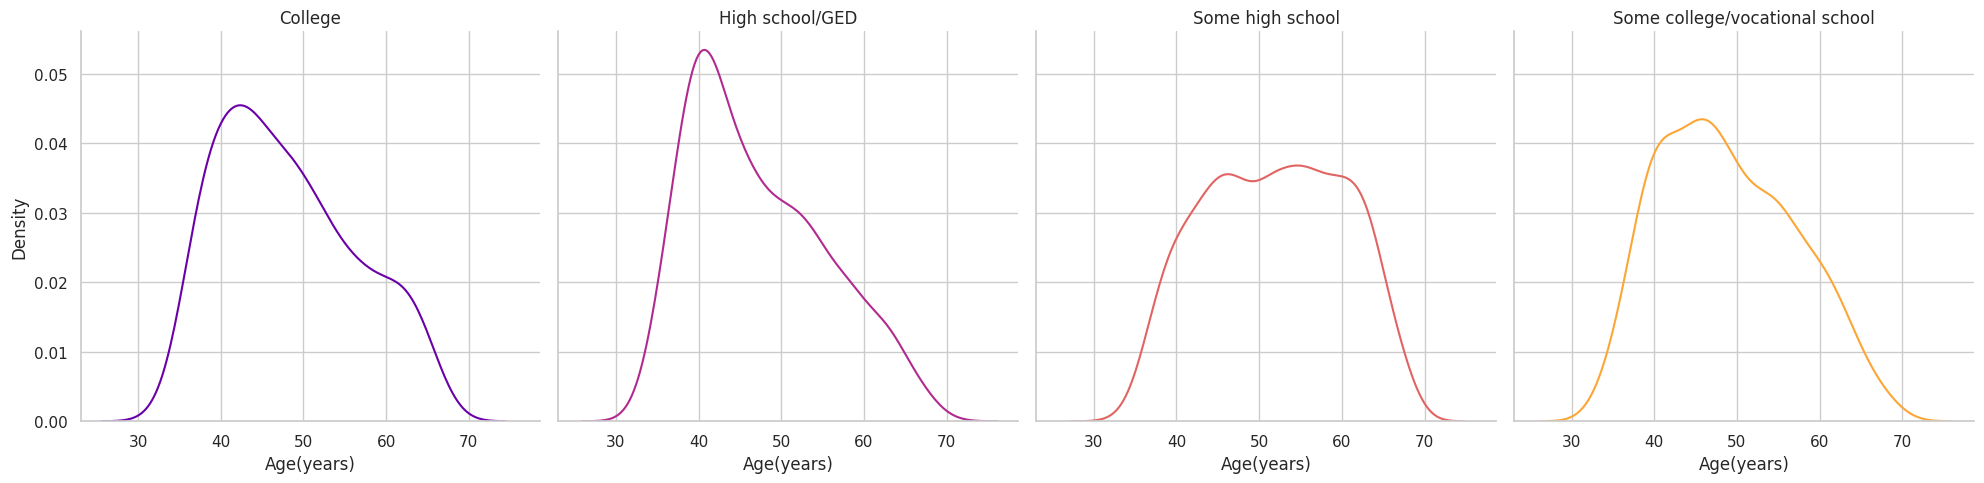

In [ ]:
#Creating filtered dataframe to remove NA and empty values
filter_not_available = df[df['education'] != 'Not Available']

facet_plot = sns.FacetGrid(data=filter_not_available, col='education', hue='education', palette='plasma', height=5)
facet_plot.map(sns.kdeplot, 'age', common_norm=False)

facet_plot.set_axis_labels('Age(years)', 'Density')
facet_plot.set_titles(col_template='{col_name}')

plt.show()


**Question:**

How does the blood pressure vary between patients that have TenYearCHD vs those that do not? Is there a correlation?

**Observation:**

1. We can infer that the mean sysBP and diaBP trends for patients diagnosed with CHD is higher that those who are not.
2. This can be correlated with the educational background the participants come from, based on the same age ranges.


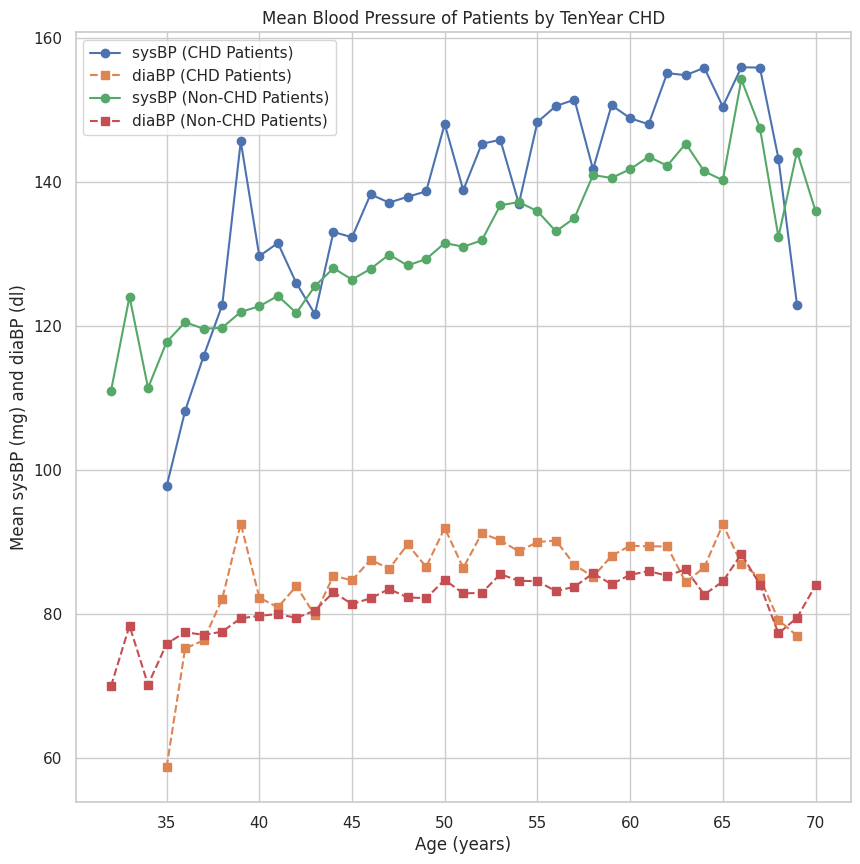

In [ ]:
# Filtering the DataFrame
non_CHD = df[(df['TenYearCHD'] == 0) & (df['TenYearCHD'] != 'Not Available')]
CHD = df[(df['TenYearCHD'] == 1) & (df['TenYearCHD'] != 'Not Available')]

# Grouping the categories
age_grouped_non_CHD = non_CHD.groupby('age')[['sysBP', 'diaBP']].mean()
age_grouped_CHD = CHD.groupby('age')[['sysBP', 'diaBP']].mean()

# Plotting the mean values
plt.figure(figsize=(10, 10))
plt.plot(age_grouped_CHD.index, age_grouped_CHD['sysBP'], marker='o', linestyle='-', label='sysBP (CHD Patients)')
plt.plot(age_grouped_CHD.index, age_grouped_CHD['diaBP'], marker='s', linestyle='--', label='diaBP (CHD Patients)')
plt.plot(age_grouped_non_CHD.index, age_grouped_non_CHD['sysBP'], marker='o', linestyle='-', label='sysBP (Non-CHD Patients)')
plt.plot(age_grouped_non_CHD.index, age_grouped_non_CHD['diaBP'], marker='s', linestyle='--', label='diaBP (Non-CHD Patients)')
plt.xlabel('Age (years)')
plt.title('Mean Blood Pressure of Patients by TenYear CHD')
plt.grid(True)
ax = plt.gca()
ax.set_ylabel('Mean sysBP (mg) and diaBP (dl)')
plt.legend()
plt.show()


**Question:**

Although age and educational background affect a participants risk of developing TenYearCHD, does their smoking habits increase their risk as well?

**Observation:**

It can be seen that older patients are more likely to develop CHD. Smokers seem to be at a larger risk of developing CHD at a younger age, as compared to non-smokers.

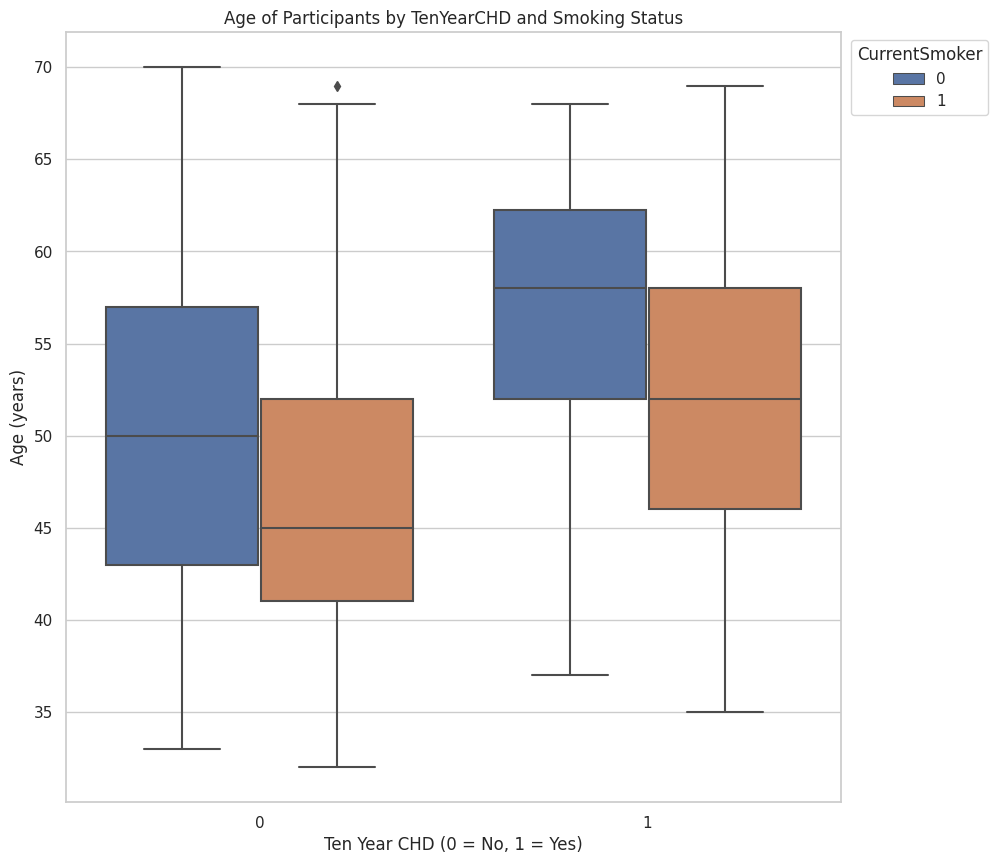

In [ ]:
#Creating a boxplot and grouping by currentSmoker
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")  # Set the style, if needed

ax = sns.boxplot(x='TenYearCHD', y='age', hue='currentSmoker', data=df)
ax.set(ylabel='Age (years)', xlabel='Ten Year CHD (0 = No, 1 = Yes)')
plt.title('Age of Participants by TenYearCHD and Smoking Status')
ax.legend(title='CurrentSmoker', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()


**Question:**

With total cholesterol having the highest variance in the dataset, how does this add to the risk of participants testing positive for TenYear CHD?

**Observation:**

It can be seen that as participants age, they have a higher median cholesterol level, however those that have Ten Year CHD have a higher density.

The distribution density displays lower variance as individuals age and are diagnosed with CHD, in contrast to the distribution of those without CHD.

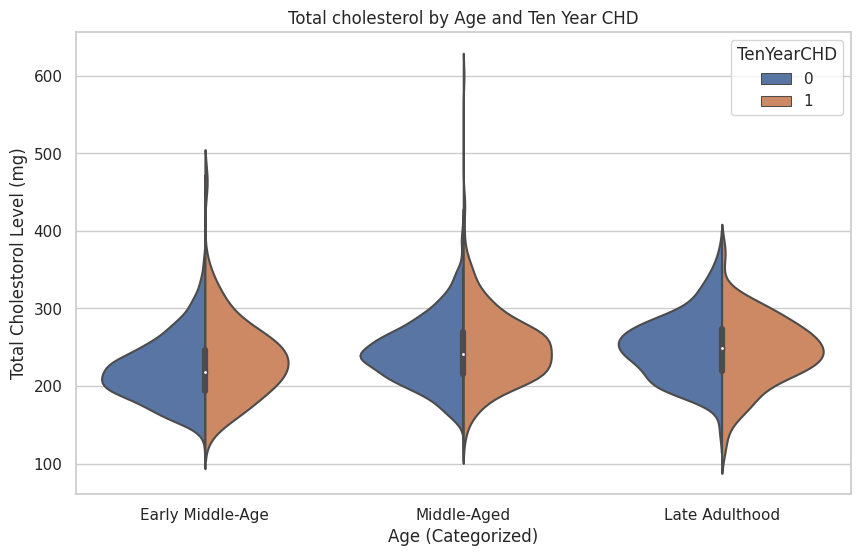

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='age_category', y='totChol', hue='TenYearCHD', data=df, split=True)
plt.xlabel('Age (Categorized)')
ax = plt.gca()
ax.set_ylabel('Total Cholestorol Level (mg)')
plt.title('Total cholesterol by Age and Ten Year CHD')
plt.show()


Question:

So far we have analyzed the key components in a participants age and health metrics. However, another key diffrence in their biology is their gender. Does being male or female affect TenYearCHD?

**Observation:**

The observations reveal a significant prevalence of individuals who do not have CHD.

Around 80% to 90% of females fall into the negative category, compared to  60% to 70% of males.

About 10% of both females and males have tested positive for CHD. This highlights an imbalance in the dataset, where negative classifications dominate, while positive classifications constitute approximately 10% to 15%.

Text(0.5, 1.0, 'Ten Year CHD by Gender')

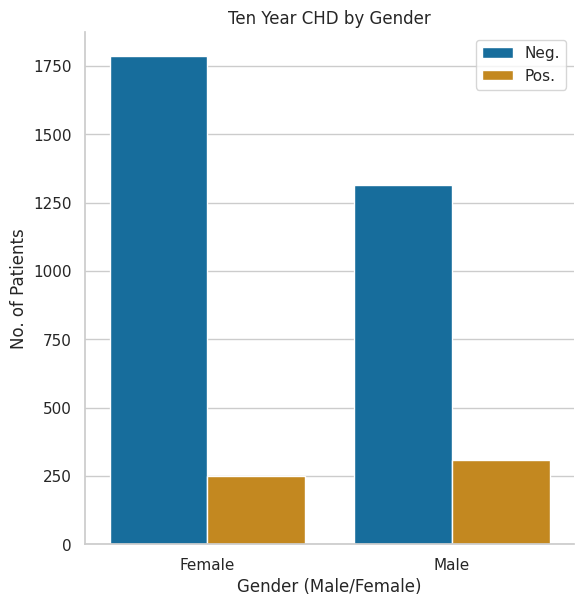

In [ ]:
#Creating a catplot to visualize male vs female CHD
sns.catplot(x='male', hue='TenYearCHD', data=df, kind='count', palette='colorblind', height=6, legend=False)
plt.xlabel('Gender (Male/Female)')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
ax = plt.gca()
ax.set_ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('Ten Year CHD by Gender')
